<a href="https://colab.research.google.com/github/IamMarcIvanov/DroughtStudiesProject/blob/master/lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
np.random.seed(23)

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
dataset = pd.read_csv('/content/gdrive/My Drive/IMD Rainfall/rain_Point_1.csv', index_col= 0, parse_dates= True)
dataset = dataset.diff(2)
dataset.dropna(inplace= True)

In [5]:
dataset.drop(columns= ['LONGITUDE', 'LATITUDE'], inplace= True)

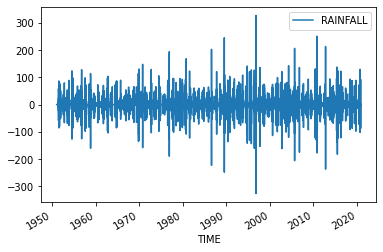

In [6]:
dataset.plot()

In [7]:
train_size = int(len(dataset) * 0.7)
test_size = int(len(dataset) * 0.3)

In [8]:
train = dataset.to_numpy()[:train_size]
test = dataset.to_numpy()[train_size:]

In [9]:
look_back = 5

In [10]:
def create_dataset(dataset, look_back= look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back - 1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units= 64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= 'Adam')
model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=1, validation_split= 0.1, shuffle= False)

Epoch 1/30
16097/16097 [==============================] - 27s 2ms/step - loss: 148.0998 - val_loss: 314.9968
Epoch 2/30
16097/16097 [==============================] - 25s 2ms/step - loss: 121.9151 - val_loss: 301.1912
Epoch 3/30
16097/16097 [==============================] - 25s 2ms/step - loss: 116.2176 - val_loss: 289.5544
Epoch 4/30
16097/16097 [==============================] - 25s 2ms/step - loss: 113.5182 - val_loss: 283.1309
Epoch 5/30
16097/16097 [==============================] - 25s 2ms/step - loss: 111.7425 - val_loss: 281.0344
Epoch 6/30
16097/16097 [==============================] - 25s 2ms/step - loss: 110.0873 - val_loss: 280.9057
Epoch 7/30
16097/16097 [==============================] - 25s 2ms/step - loss: 109.4570 - val_loss: 274.1403
Epoch 8/30
16097/16097 [==============================] - 25s 2ms/step - loss: 108.5476 - val_loss: 279.5236
Epoch 9/30
16097/16097 [==============================] - 25s 2ms/step - loss: 108.3032 - val_loss: 278.9709
Epoch 10/30
16097/1

In [14]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# # invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# y_train = scaler.inverse_transform([y_train])
# testPredict = scaler.inverse_transform(testPredict)
# y_test = scaler.inverse_transform([y_test])

In [15]:
from sklearn.metrics import mean_absolute_error

In [16]:
trainScore = mean_absolute_error(y_train, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
r2train = r2_score(y_train, trainPredict[:, 0])
print('R2 Score Train: %.2f R2' % (r2train))
r2test = r2_score(y_test, testPredict[:, 0])
print('R2 Score Test: %.2f R2' % (r2test))

Train Score: 4.38 MAE
Test Score: 5.15 MAE
R2 Score Train: 0.45 R2
R2 Score Test: 0.40 R2


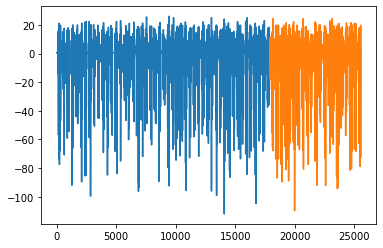

In [17]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()